In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
dataset = pd.read_csv("../Datasets/Social_Network_ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [23]:
cv_scores = cross_val_score(estimator=SVC(kernel = "rbf", C = 10, gamma=0.5), X= X_train, y=y_train, cv=10)
cv_scores

array([0.76666667, 0.96666667, 0.76666667, 0.93333333, 0.86666667,
       0.9       , 0.9       , 0.93333333, 1.        , 0.96666667])

In [24]:
print("cv_scores mean: {}".format(np.mean(cv_scores)))
print("cv_scores std: {}".format(np.std(cv_scores)))

cv_scores mean: 0.9
cv_scores std: 0.07601169500660919


In [25]:
parameters = [
    {'C': [1,10,100,1000], 'kernel':['linear']},
    {'C': [1,10,100,1000], 'kernel': ['rbf'], 'gamma':[0.5,0.1,0.01, 0.0001]}
]
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.5, 0.1, 0.01, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [26]:
grid_search.best_score_ 

0.9066666666666666

In [27]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [28]:
classifier = SVC(kernel = "rbf", C = 1000, gamma=0.1).fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion matrix, without normalization
[[64  4]
 [ 3 29]]


Normalized confusion matrix
[[0.94117647 0.05882353]
 [0.09375    0.90625   ]]


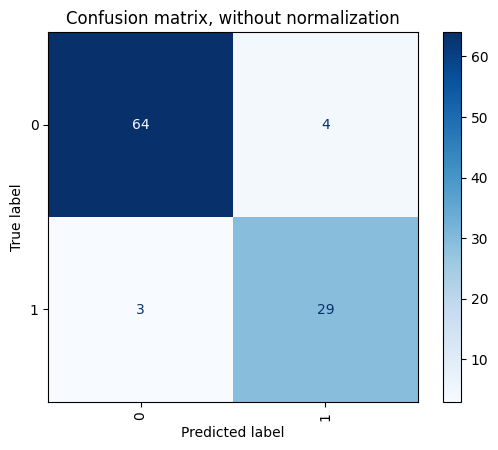

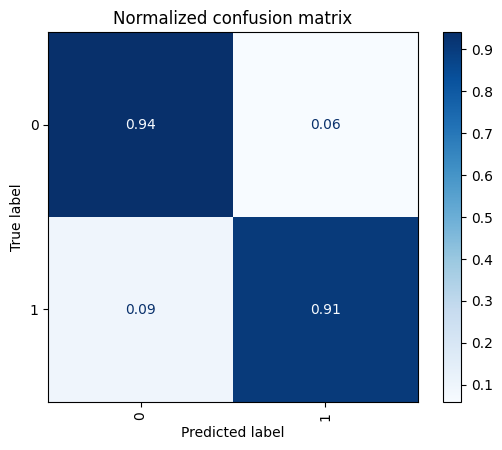

In [29]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm = confusion_matrix(y_test, y_pred)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    if normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm if not normalize else cm_normalized)

plt.show()

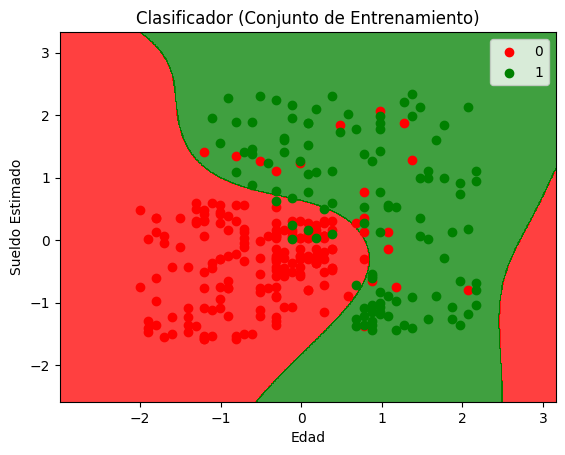

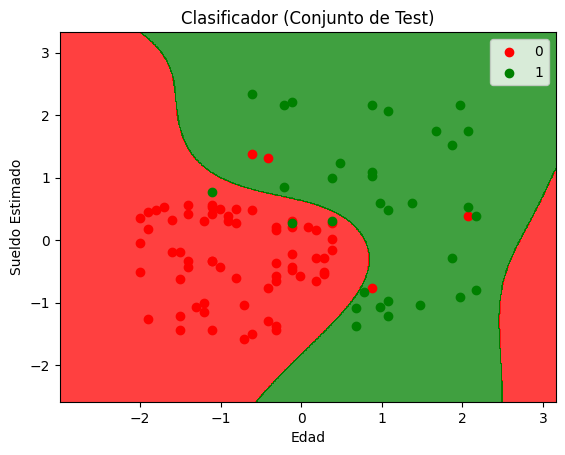

In [31]:
def plot_classifier(classifier, X_set, y_set, xlabel, ylabel, title):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ['red', 'green'][i], label = j)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

plot_classifier(classifier, X_train, y_train, 'Edad', 'Sueldo Estimado', 'Clasificador (Conjunto de Entrenamiento)')
plot_classifier(classifier, X_test, y_test, 'Edad', 'Sueldo Estimado', 'Clasificador (Conjunto de Test)')